# Task 1b: Build a logistic regression model 


In [14]:
import pandas as pd

# Read the dataset into a DataFrame
df = pd.read_csv('student_data.csv')

# Get the number of rows (samples) and columns (features) in the dataset
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 100
Number of columns: 3


In [15]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours_Studied   100 non-null    float64
 1   Review_Session  100 non-null    int64  
 2   Results         100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


,Hours_Studied,Review_Session,Results
0,3.745401,0,0
1,9.507143,1,1
2,7.319939,0,1
3,5.986585,0,1
4,1.560186,1,1


In [16]:
df = df.drop_duplicates()
df = df.dropna()

In [6]:
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 100
Number of columns: 3


In [8]:
pip install pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


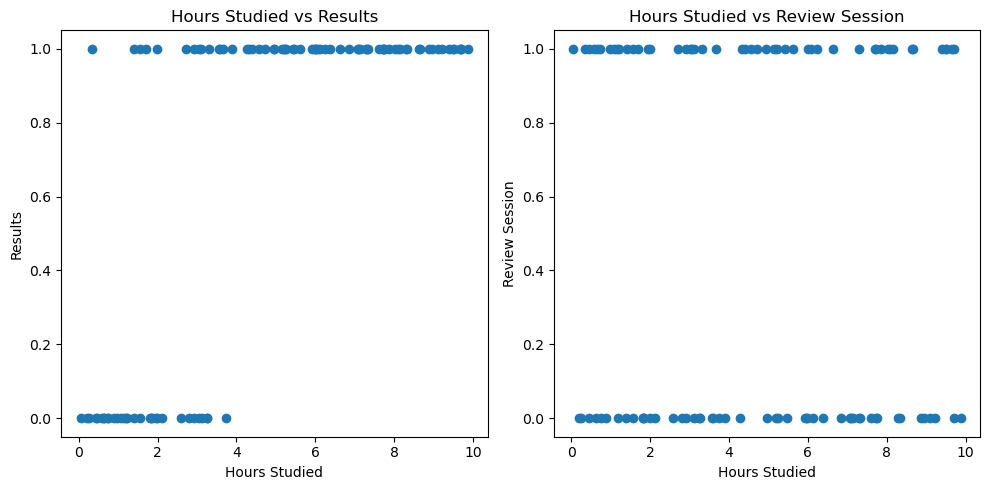

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset into a DataFrame
data = pd.read_csv('student_data.csv')  # Replace 'student_data.csv' with the actual file path

# Create a scatter plot for 'Hours Studied' vs 'Results'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data['Hours_Studied'], data['Results'])
plt.xlabel('Hours Studied')
plt.ylabel('Results')
plt.title('Hours Studied vs Results')

# Create a scatter plot for 'Hours Studied' vs 'Review Session'
plt.subplot(1, 2, 2)
plt.scatter(data['Hours_Studied'], data['Review_Session'])
plt.xlabel('Hours Studied')
plt.ylabel('Review Session')
plt.title('Hours Studied vs Review Session')

plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Read the dataset into a DataFrame

# Define the features (X) and the target (y)
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predict the target variable using the same dataset
y_pred = model.predict(X)

# Calculate the accuracy of the model
accuracy = accuracy_score(y, y_pred)
print("Accuracy of the logistic regression model: {:.2f}%".format(accuracy * 100))


Accuracy of the logistic regression model: 93.00%


Accuracy of the logistic regression model: 93.00%


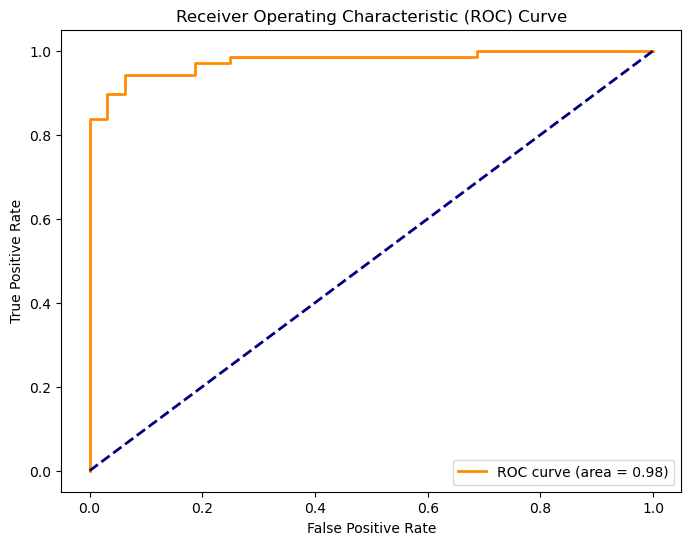

AUC (Area Under the Curve): 0.98


In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Define the features (X) and the target (y)
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predict the target variable using the same dataset
y_pred = model.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy of the logistic regression model: {:.2f}%".format(accuracy * 100))

# Calculate AUC and plot ROC curve
y_prob = model.predict_proba(X)[:, 1]
roc_auc = roc_auc_score(y, y_prob)

fpr, tpr, _ = roc_curve(y, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC (Area Under the Curve): {:.2f}".format(roc_auc))


# Task 2:  Understanding and Prevent Overfitting in the context of SVM 

In [12]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Read the dataset into a DataFrame
data = pd.read_csv('student_data.csv')  # Replace 'student_data.csv' with the actual file path

# Define the features (X) and the target (y)
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# Create and fit the SVM model with a linear kernel
model = SVC(kernel='linear')
model.fit(X, y)

# Predict the target variable using the same dataset
y_pred = model.predict(X)

# Calculate the accuracy of the model
accuracy = accuracy_score(y, y_pred)
print("Accuracy of the SVM model with a linear kernel: {:.2f}%".format(accuracy * 100))


Accuracy of the SVM model with a linear kernel: 92.00%


In [13]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Read the dataset into a DataFrame
data = pd.read_csv('student_data.csv')  # Replace 'student_data.csv' with the actual file path

# Define the features (X) and the target (y)
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of gamma values to search over
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}

# Create an SVM model with an RBF kernel
svm = SVC(kernel='rbf')

# Use GridSearchCV to find the best gamma parameter using k-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best gamma parameter from the grid search
best_gamma = grid_search.best_params_['gamma']

# Create an SVM model with the best gamma parameter
best_svm = SVC(kernel='rbf', gamma=best_gamma)

# Fit the model to the training data
best_svm.fit(X_train, y_train)

# Predict the target variable using the test data
y_pred = best_svm.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Best gamma parameter:", best_gamma)
print("Accuracy of the SVM model with the best gamma: {:.2f}%".format(accuracy * 100))


Best gamma parameter: 1
Accuracy of the SVM model with the best gamma: 85.00%
